## **welch y fft en ventanas fijas**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import seaborn as sns
import sys
import scipy.signal as signal
import os
import scipy.io as io

import sys

sys.path.append('../data')
from data import load_data

sns.set_style("darkgrid")

In [4]:
# Load data
fpath = "/Users/granosftp/Documents/GitHub/Tesis/data"

mat = load_data(fpath, 'datosconsu_021023_bajos.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'time', 'data'])

In [5]:
df = pd.DataFrame(mat['data'], columns = ['amp'])
df['amp_mean'] = df.amp - df.amp.mean()
df['dif'] = df.amp_mean.diff()
df.tail()

,amp,amp_mean,dif
599995,5.210999,-0.843661,-0.112124
599996,5.063692,-0.990968,-0.147307
599997,5.012726,-1.041933,-0.050966
599998,4.868050,-1.186610,-0.144676
599999,4.806563,-1.248097,-0.061487


### **ventanas**
se hacen 10 ventanas de aproximadamente 60.000 pts sin overlap y se hace welch a cada una de ellas


In [6]:
#size = 60000
df_window = np.array_split(df.amp, 10)
df_window = np.array(df_window)
df_window.shape

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


(10, 60000)

#### **welch**

In [7]:
x = np.zeros([10,129])
_f = []
for i, window in enumerate(df_window):
    f, pxx = signal.welch(window, fs = 1000)#, nperseg = 1024*4, nfft = 4096)
    #print(pxx.shape)
    x[i] = pxx
    _f = f

In [8]:
t = np.linspace(0, 6000, 6000)

Matplotlib is building the font cache; this may take a moment.
Fontconfig warning: ignoring UTF-8: not a valid region tag


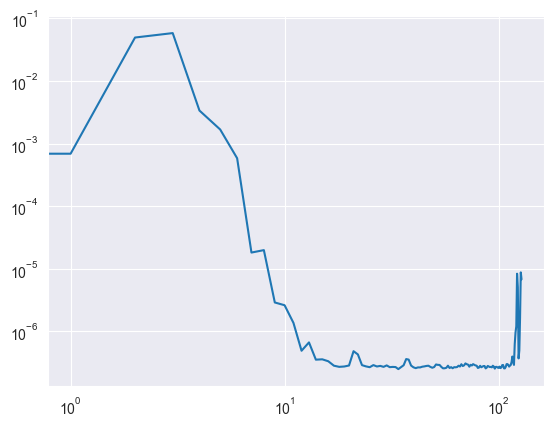

In [9]:
plt.loglog(x[0])

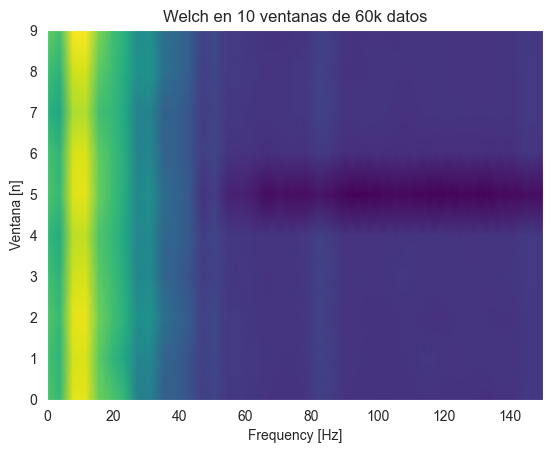

In [10]:
windows = np.arange(0, 10, 1)
plt.pcolormesh(_f,windows, x, shading='gouraud', cmap = 'viridis', norm = 'log')
plt.ylabel('Ventana [n]')
plt.xlabel('Frequency [Hz]')
plt.title('Welch en 10 ventanas de 60k datos')
plt.xlim([0,150])
plt.show()

#### **spectogram**

In [11]:
X = np.zeros([10,501,68])
f_ = []
t_ = []
for i, window in enumerate(df_window):
    f,t, Sxx = signal.spectrogram(window, fs = 1000, nperseg=1000)
    #print(Sxx.shape)
    X[i] = Sxx
    f_ = f
    t_ = t

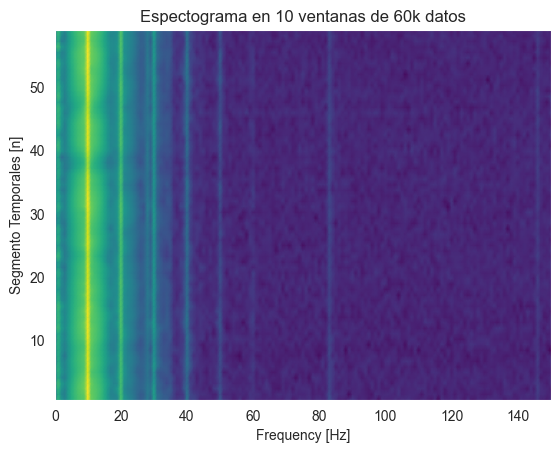

In [12]:
new_X = np.sum(X, axis=0)
plt.pcolormesh(f_, t_, new_X.T, shading='gouraud', cmap = 'viridis', norm = 'log')
#plt.pcolormesh(x, shading='gouraud', cmap = 'viridis')
plt.ylabel('Segmento Temporales [n]')
plt.xlabel('Frequency [Hz]')
plt.title('Espectograma en 10 ventanas de 60k datos')
plt.xlim([0,150])
plt.show()